# **Data Collection**

## Install Libraries

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


## Import Libraries

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search Target Protein

Search Aromatase from **ChEMBL** Database

In [ ]:
target = new_client.target
target_query = target.search('aromatase')
search_target = pd.DataFrame.from_dict(target_query)

Print the output of the search result

In [ ]:
search_target

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


## Selection of Bioactivity Data

Select the target **ChEMBL** id from the searched Aromatase

In [ ]:
selected_target = search_target.target_chembl_id[0]

See the details about the selected **ChEMBL** id

In [ ]:
selected_target

'CHEMBL1978'

## Retrieve of Bioactivity Data

Select the IC50 standard type only for retrieve

In [ ]:
activity = new_client.activity
response = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

Print the the selected **ChEMBL** id to frame

In [ ]:
bio_df = pd.DataFrame.from_dict(response)
bio_df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005
2923,None,24377184,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.063
2924,None,24377185,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0


See if there is what standard type on our selected **ChEMBL**

In [ ]:
bio_df.standard_type.unique()

array(['IC50'], dtype=object)

## Save the Result

Save the CSV file for later use

In [ ]:
bio_df.to_csv('aromatase_bioactivity_data.csv', index=False)

## Handle Missing Data

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [ ]:
missing_df = bio_df[bio_df.standard_value.notna()]
missing_df = missing_df[bio_df.canonical_smiles.notna()]
missing_df

<ipython-input-11-eeaa8fdd51ac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_df = missing_df[bio_df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005
2923,None,24377184,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.063
2924,None,24377185,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0


Print the length of **Canonical Smiles** from the above frame.

In [ ]:
len(missing_df.canonical_smiles.unique())

2095

Remove duplicates if there is a duplicate data and print the output

In [ ]:
remove_duplicate_df = missing_df.drop_duplicates("canonical_smiles")
remove_duplicate_df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,None,24377180,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,1.002
2920,None,24377181,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.9
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005


## Data Preprocessing

### Combination of ID, Smile & Std_Value

Combine 'molecule_chembl_id', 'canonical_smiles', 'standard_value'

In [ ]:
combined_selection = ['molecule_chembl_id','canonical_smiles','standard_value']
combined_df = remove_duplicate_df[combined_selection]
combined_df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2919,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0
2920,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0
2921,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0
2922,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0


Save the Updated Data

In [ ]:
combined_df.to_csv("aromatase_bioactivity_data_preprocessed.csv", index = False)

### Labeling Active, Inactive & Intermediate

The Bioactivity data having IC50 unit compounds less than 1000nM -> **Active**, greater than 10,000 nM will be **Inactive** and in between will be **Intermediate**

Read the latest data that preprocessed

In [ ]:
labeling_df = pd.read_csv("aromatase_bioactivity_data_preprocessed.csv")

Iterate over the read preprocessed data to label **Active**, **Inactive** and **Intermediate**

In [ ]:
bioactivity_threshold = []
for index in labeling_df.standard_value:
  if float(index) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(index) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

Label and print as a frame

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
labeled_df = pd.concat([labeling_df, bioactivity_class], axis=1)
labeled_df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0,intermediate
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0,active
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active


Save the dataframe into the csv file for later use

In [ ]:
labeled_df.to_csv("aromatase_bioactivity_data_curated.csv", index=False)

Zip all files that is ended with csv that saved until now

In [ ]:
! zip aromatase_collection.zip *.csv

  adding: aromatase_bioactivity_data.csv (deflated 90%)
  adding: aromatase_bioactivity_data_curated.csv (deflated 81%)
  adding: aromatase_bioactivity_data_preprocessed.csv (deflated 79%)


Check the file is there with zip

In [ ]:
! ls -l

total 1904
-rw-r--r-- 1 root root 1449811 May 21 07:14 aromatase_bioactivity_data.csv
-rw-r--r-- 1 root root  154435 May 21 07:14 aromatase_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  135152 May 21 07:14 aromatase_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  202601 May 21 07:14 aromatase_collection.zip
drwxr-xr-x 1 root root    4096 May 18 13:38 sample_data


# **Data Analysis**

## **Install RDKit**

In [ ]:
! pip install rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 40.0 MB/s eta 0:00:00


## Load Bioactivity Data

Read the data of the loaded preprocessed data

In [ ]:
curated_data_df = pd.read_csv('aromatase_bioactivity_data_curated.csv')
curated_data_df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0,intermediate
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0,active
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active


In [ ]:
df_no_smiles = curated_data_df.drop(columns='canonical_smiles')

smiles = []

for i in curated_data_df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2090,CHEMBL5087363,1002.0,intermediate,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2091,CHEMBL5092560,900.0,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2092,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2093,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1


## Calculate Lipinski Descriptors

The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### Import Libraries

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Descriptor Calculation**

In [ ]:
def lipinski(smiles, verbose=False):

    mol_data= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        mol_data.append(mol)
       
    base_data= np.arange(1,1)
    i=0  
    for mol in mol_data:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            base_data=row
        else:
            base_data=np.vstack([base_data, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=base_data,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2090,306.365,3.81630,2.0,4.0
2091,345.442,5.33750,2.0,3.0
2092,331.415,4.94740,2.0,3.0
2093,334.419,4.66560,3.0,3.0


### **Combined Dataframes**

Combine the above two frames into one

In [ ]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,1002.0,intermediate,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,306.365,3.81630,2.0,4.0
2091,CHEMBL5092560,900.0,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0
2092,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,331.415,4.94740,2.0,3.0
2093,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0


### **Convert IC50 to PIC50**

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        if (molar == 0):
          pIC50.append(molar)
        else:
          pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

**NB**: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.



In [ ]:
df_combined.standard_value.describe()

count      2095.000000
mean      14480.416388
std       50991.930113
min           0.000000
25%         130.000000
50%        1252.000000
75%        8760.000000
max      777000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-34-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,intermediate,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,306.365,3.81630,2.0,4.0,1002.0
2091,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,900.0
2092,CHEMBL5092843,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,331.415,4.94740,2.0,3.0,3240.0
2093,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,52.0


In [ ]:
df_norm.standard_value_norm.describe()

count      2095.000000
mean      14480.416388
std       50991.930113
min           0.000000
25%         130.000000
50%        1252.000000
75%        8760.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-30-ad5ae0d7381f>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,intermediate,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,306.365,3.81630,2.0,4.0,5.999132
2091,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,6.045757
2092,CHEMBL5092843,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,331.415,4.94740,2.0,3.0,5.489455
2093,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997


In [ ]:
df_final.pIC50.describe()

count    2095.000000
mean        6.041924
std         1.297742
min         0.000000
25%         5.053064
50%         5.902049
75%         6.886057
max        10.823909
Name: pIC50, dtype: float64

### **Remove Intermediate Activity**

In [ ]:
remove_intermediate_df = df_final[df_final['class'] != 'intermediate']
remove_intermediate_df

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,active,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2088,CHEMBL5069811,active,CC(Cc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,317.388,4.55730,2.0,3.0,6.064997
2089,CHEMBL5072101,active,CCC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.20640,2.0,4.0,7.455932
2091,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,6.045757
2093,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997


In [ ]:
remove_intermediate_df.to_csv('aromatase_bioactivity_data_pIC50.csv')

## **Chemical Space Analysis**

### **Import Libraries**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency Plot of the Classes**

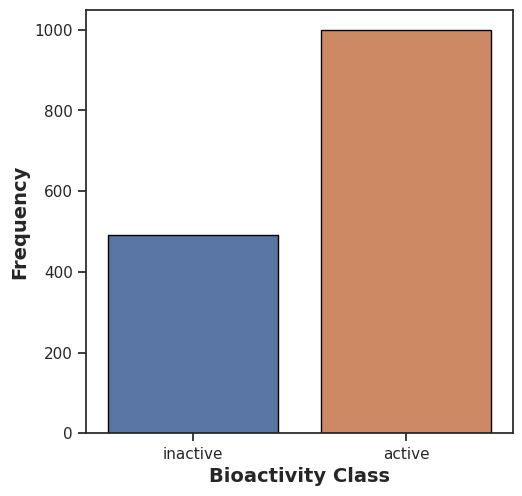

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=remove_intermediate_df, edgecolor='black')

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

Save the graph of the plot

In [ ]:
plt.savefig('plot_bioactivity_class.png', format='png')

<Figure size 640x480 with 0 Axes>

### **Scatter Plots**

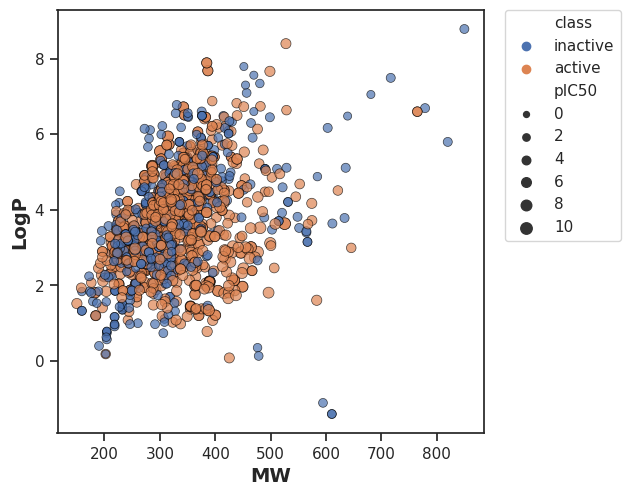

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=remove_intermediate_df, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
plt.savefig('Plot_MW_vs_LogP.pdf')

<Figure size 640x480 with 0 Axes>

### **Box Plots**

#### **PIC50 Value**

Text(0, 0.5, 'PIC50 Value')

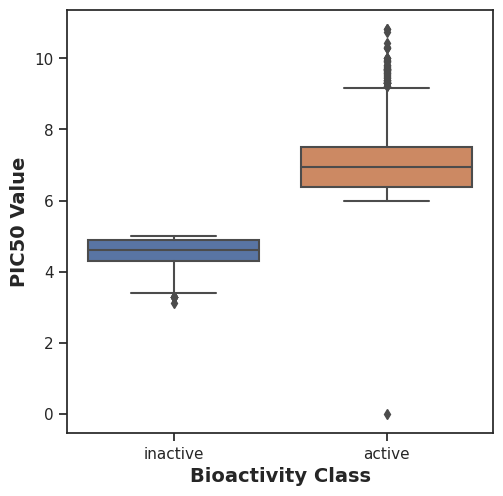

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data=remove_intermediate_df)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('PIC50 Value', fontsize=14, fontweight='bold')

In [ ]:
plt.savefig('Plot_ic50.pdf')

<Figure size 640x480 with 0 Axes>

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = remove_intermediate_df[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

# Inactive
  selection = [descriptor, 'class']
  df = remove_intermediate_df[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same Distribution (Fail to reject H0)'
  else:
    interpretation = 'Different Distribution (Reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,490018.0,8.286615e-216,0.05,Different Distribution (Reject H0)


#### **MW - Molecular Weight**

Text(0, 0.5, 'MW')

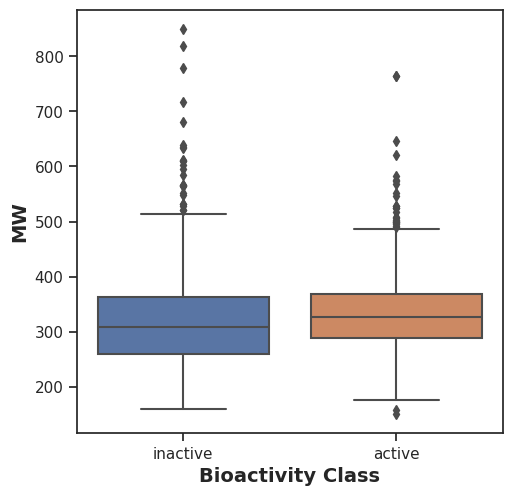

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = remove_intermediate_df)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [ ]:
plt.savefig('Plot_MW.pdf')

<Figure size 640x480 with 0 Axes>

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,278176.0,0.000025,0.05,Different Distribution (Reject H0)


#### **LogP**

Text(0, 0.5, 'LogP')

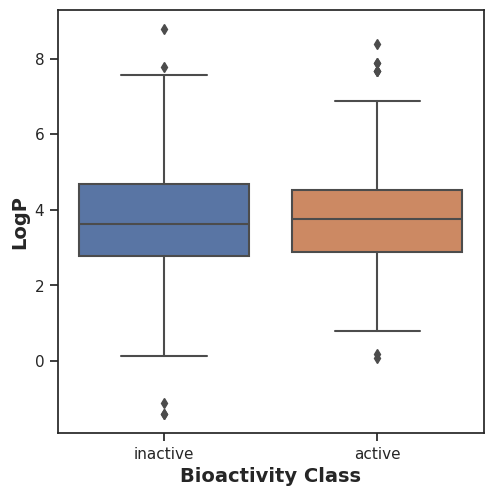

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = remove_intermediate_df)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

In [ ]:
plt.savefig('Plot_LogP.pdf')

<Figure size 640x480 with 0 Axes>

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,245863.0,0.937923,0.05,Same Distribution (Fail to reject H0)


#### **NumHDonors**

Text(0, 0.5, 'NumHDonors')

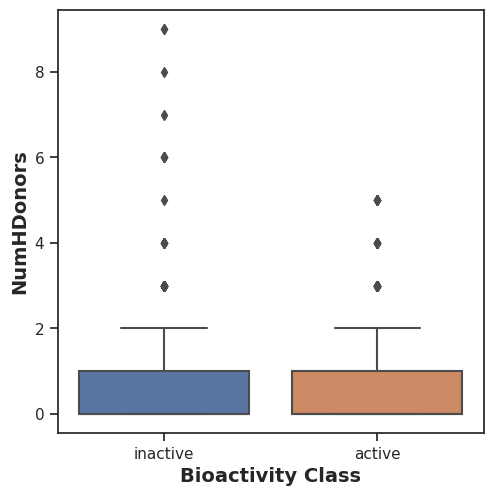

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = remove_intermediate_df)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [ ]:
plt.savefig('Plot_NumHDonors.pdf')

<Figure size 640x480 with 0 Axes>

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,230574.5,0.034401,0.05,Different Distribution (Reject H0)


#### **NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

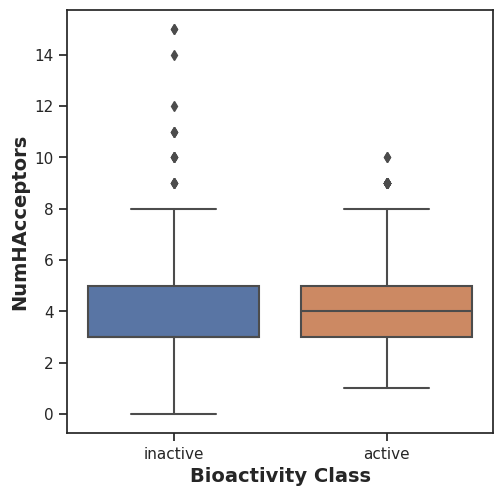

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = remove_intermediate_df)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [ ]:
plt.savefig('Plot_NumHAcceptors.pdf')

<Figure size 640x480 with 0 Axes>

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,263081.0,0.02004,0.05,Different Distribution (Reject H0)


Finally save by zipping all images of plots

In [ ]:
! zip -r aromatase_analysis.zip . -i *.csv *.pdf

  adding: aromatase_bioactivity_data_pIC50.csv (deflated 76%)
  adding: aromatase_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: Plot_MW.pdf (deflated 49%)
  adding: aromatase_bioactivity_data_curated.csv (deflated 81%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: Plot_LogP.pdf (deflated 49%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: Plot_MW_vs_LogP.pdf (deflated 49%)
  adding: Plot_ic50.pdf (deflated 49%)
  adding: aromatase_bioactivity_data.csv (deflated 90%)
  adding: Plot_NumHAcceptors.pdf (deflated 49%)
  adding: Plot_NumHDonors.pdf (deflated 49%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)


In [ ]:
! ls -l

total 2392
-rw-r--r-- 1 root root  255026 May 21 07:20 aromatase_analysis.zip
-rw-r--r-- 1 root root 1449811 May 21 07:14 aromatase_bioactivity_data.csv
-rw-r--r-- 1 root root  154435 May 21 07:14 aromatase_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  190316 May 21 07:19 aromatase_bioactivity_data_pIC50.csv
-rw-r--r-- 1 root root  135152 May 21 07:14 aromatase_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  202601 May 21 07:14 aromatase_collection.zip
-rw-r--r-- 1 root root     123 May 21 07:20 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root     123 May 21 07:19 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root     132 May 21 07:20 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root     129 May 21 07:20 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root     125 May 21 07:19 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root    2396 May 21 07:19 plot_bioactivity_class.png
-rw-r--r-- 1 root root    1199 May 21 07:19 Plot_ic50.pdf
-rw-r--r-- 1 root root    1199 May 21 07:20 Plot_LogP

# **Descriptor Calculation**

## **Download PaDEL Descriptor**

In [ ]:
! wget https://github.com/getdaniel/bc-drug/raw/main/padel.zip
! wget https://github.com/getdaniel/bc-drug/raw/main/padel.sh

--2023-05-21 07:20:31--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-05-21 07:20:31--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   156MB/s    in 0.2s    

2023-05-21 07:20:31 (156 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-05-21 07:20:31--  https://github

Remove the unzipped value

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load Bioactivity Data**

In [ ]:
load_df = pd.read_csv('aromatase_bioactivity_data_pIC50.csv')
load_df

,Unnamed: 0,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,4.301030
1,2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,6.623423
2,3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,7.244125
3,4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,7.267606
4,6,CHEMBL41761,active,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...,...
1485,2088,CHEMBL5069811,active,CC(Cc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,317.388,4.55730,2.0,3.0,6.064997
1486,2089,CHEMBL5072101,active,CCC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.20640,2.0,4.0,7.455932
1487,2091,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,6.045757
1488,2093,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997


In [ ]:
descr_selection = ['canonical_smiles','molecule_chembl_id']
load_df_selection = load_df[descr_selection]
load_df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
!zip -r PaDEL-Descriptor.zip PaDEL-Descriptor
from google.colab import files
files.download("PaDEL-Descriptor.zip")

  adding: PaDEL-Descriptor/ (stored 0%)
  adding: PaDEL-Descriptor/PaDEL-Descriptor.jar (deflated 20%)
  adding: PaDEL-Descriptor/Descriptors.xls (deflated 78%)
  adding: PaDEL-Descriptor/lib/ (stored 0%)
  adding: PaDEL-Descriptor/lib/commons-cli-1.2(2).jar (deflated 9%)
  adding: PaDEL-Descriptor/lib/jama(4).jar (deflated 3%)
  adding: PaDEL-Descriptor/lib/libPaDEL-Jobs(1).jar (deflated 52%)
  adding: PaDEL-Descriptor/lib/commons-cli-1.2.jar (deflated 9%)
  adding: PaDEL-Descriptor/lib/commons-cli-1.2(1).jar (deflated 9%)
  adding: PaDEL-Descriptor/lib/jama(7).jar (deflated 3%)
  adding: PaDEL-Descriptor/lib/ambit2-smarts-2.4.7-SNAPSHOT(5).jar (deflated 5%)
  adding: PaDEL-Descriptor/lib/jama.jar (deflated 3%)
  adding: PaDEL-Descriptor/lib/jgrapht-0.6.0(2).jar (deflated 20%)
  adding: PaDEL-Descriptor/lib/swing-worker-1.1.jar (deflated 18%)
  adding: PaDEL-Descriptor/lib/cdk-1.4.15.jar (deflated 6%)
  adding: PaDEL-Descriptor/lib/commons-cli-1.2(3).jar (deflated 9%)
  adding: PaDEL-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! cat molecule.smi | head -5

C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21	CHEMBL41761


In [ ]:
! cat molecule.smi | wc -l

1490


## **Fingerprint Descriptor Calculation**

### **PaDEL Descriptor Calculation**

See the content of padel.sh file named

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


Execute the bash file

In [ ]:
! bash padel.sh

Processing CHEMBL2111947 in molecule.smi (1/1490). 
Processing CHEMBL431859 in molecule.smi (2/1490). 
Processing CHEMBL113637 in molecule.smi (3/1490). Average speed: 4.66 s/mol.
Processing CHEMBL112021 in molecule.smi (4/1490). Average speed: 3.06 s/mol.
Processing CHEMBL41761 in molecule.smi (5/1490). Average speed: 2.26 s/mol.
Processing CHEMBL111868 in molecule.smi (6/1490). Average speed: 1.91 s/mol.
Processing CHEMBL111888 in molecule.smi (7/1490). Average speed: 1.83 s/mol.
Processing CHEMBL112074 in molecule.smi (8/1490). Average speed: 1.71 s/mol.
Processing CHEMBL324326 in molecule.smi (9/1490). Average speed: 1.60 s/mol.
Processing CHEMBL353068 in molecule.smi (10/1490). Average speed: 1.50 s/mol.
Processing CHEMBL166709 in molecule.smi (11/1490). Average speed: 1.37 s/mol.
Processing CHEMBL424556 in molecule.smi (12/1490). Average speed: 1.28 s/mol.
Processing CHEMBL169251 in molecule.smi (14/1490). Average speed: 1.12 s/mol.
Processing CHEMBL1630261 in molecule.smi (13/14

## **Prepare X and Y Data Matrix**

### **X Data Matrix**

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,CHEMBL5069811,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1486,CHEMBL5072101,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1487,CHEMBL5092560,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488,CHEMBL5074047,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1486,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1487,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1488,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Y Data Matrix**

In [ ]:
df_Y = load_df['pIC50']
df_Y

0       4.301030
1       6.623423
2       7.244125
3       7.267606
4       7.387216
          ...   
1485    6.064997
1486    7.455932
1487    6.045757
1488    7.283997
1489    7.200659
Name: pIC50, Length: 1490, dtype: float64

### **Combine X & Y**

In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.064997
1486,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
1487,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
1488,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.283997


Save the dataset for model building

In [ ]:
dataset.to_csv('aromatase_datasets.csv', index=False)

# **Build the Model**

## **Import Libraries**

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Load Dataset**

In [ ]:
dataset_df = pd.read_csv('aromatase_datasets.csv')
dataset_df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.62
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.24
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.27
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.06
1486,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.46
1487,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.05
1488,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.28


## **Input Features**

### **Input Features**

In [ ]:
X = dataset_df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1486,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1487,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1488,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Output Features**

In [ ]:
Y = dataset_df.iloc[:, -1]
Y

0      4.30
1      6.62
2      7.24
3      7.27
4      7.39
       ... 
1485   6.06
1486   7.46
1487   6.05
1488   7.28
1489   7.20
Name: pIC50, Length: 1490, dtype: float64

### **Remove Low Variance**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  
  return input_data[input_data.columns[selection.get_support(indices = True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1
2,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1486,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1487,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1488,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X.to_csv('descriptor_list.csv', index = False)

## **Build Model**

Build the model using **Random Forest Regression**

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8379037679339119

## Model Preiction

In [ ]:
y_prediction = model.predict(X)
y_prediction

array([6.6349999 , 6.35161302, 6.6349999 , ..., 6.14909729, 7.10524726,
       7.10524726])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# assume Y and y_prediction are defined
mse = mean_squared_error(Y, y_prediction)
r2 = r2_score(Y, y_prediction)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Coefficient of determination (R^2): {r2:.2f}")

Mean squared error (MSE): 0.35
Coefficient of determination (R^2): 0.84


In [ ]:
import pickle
pickle.dump(model, open("aromatase.pkl", "wb"))

## **Scatter Plot**

 Scatter plot of Experimental vs Predicted pIC50 Values

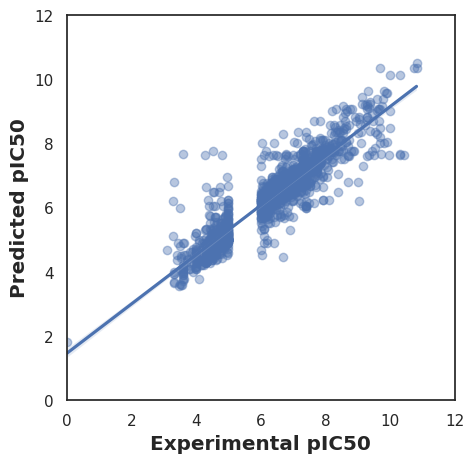

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

Y_pred = model.predict(X)

ax = sns.regplot(x=Y, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

# **Model Comparsion**

## **Install Library**

In [ ]:
! pip3 install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Load Dataset**

In [ ]:
compare_df = pd.read_csv("aromatase_datasets.csv")

In [ ]:
X = compare_df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1486,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1487,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1488,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = compare_df.pIC50
Y

0      4.30
1      6.62
2      7.24
3      7.27
4      7.39
       ... 
1485   6.06
1486   7.46
1487   6.05
1488   7.28
1489   7.20
Name: pIC50, Length: 1490, dtype: float64

## **Data Pre-Processing**

### **Removing**

Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  
  return input_data[input_data.columns[selection.get_support(indices = True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1
2,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1486,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1487,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1488,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## **Comparsion**

Perform data splitting using 80/20 ratio

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Compare different types of model building result. Defines and builds the lazyclassifier

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [02:25<00:00,  3.46s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:58<00:00,  2.82s/it]


Performance table of the training set (80% subset)

In [ ]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.89,0.50,0.13
ExtraTreeRegressor,0.86,0.89,0.50,0.21
ExtraTreesRegressor,0.86,0.89,0.50,9.72
GaussianProcessRegressor,0.86,0.89,0.50,5.14
XGBRegressor,0.85,0.88,0.52,1.73
RandomForestRegressor,0.79,0.83,0.61,2.95
BaggingRegressor,0.77,0.81,0.65,0.28
MLPRegressor,0.76,0.81,0.65,4.41
HistGradientBoostingRegressor,0.70,0.77,0.73,2.33


Performance table of the test set (20% subset)

In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,-2.20,0.49,0.96,2.77
LGBMRegressor,-2.24,0.49,0.96,2.49
RandomForestRegressor,-2.29,0.48,0.97,2.95
SVR,-2.30,0.48,0.97,0.35
NuSVR,-2.31,0.48,0.97,0.29
GradientBoostingRegressor,-2.50,0.45,1.00,0.87
KNeighborsRegressor,-2.53,0.44,1.00,0.12
XGBRegressor,-2.68,0.42,1.02,1.42
BaggingRegressor,-2.69,0.42,1.03,0.28


## **Data Visualization**

Bar plot of R-squared values

[(0.0, 1.0)]

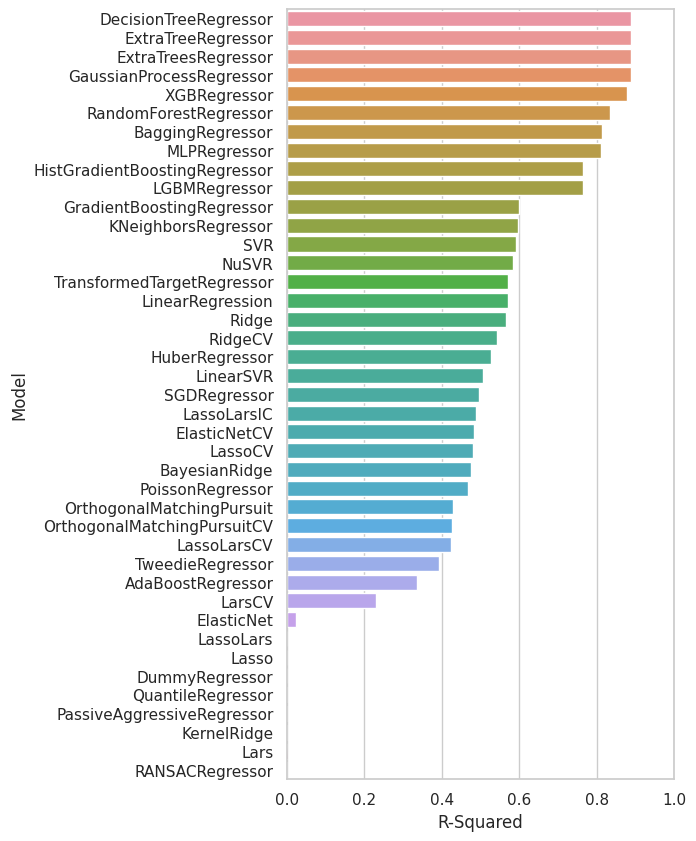

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

Bar plot of RMSE values

[(0.0, 10.0)]

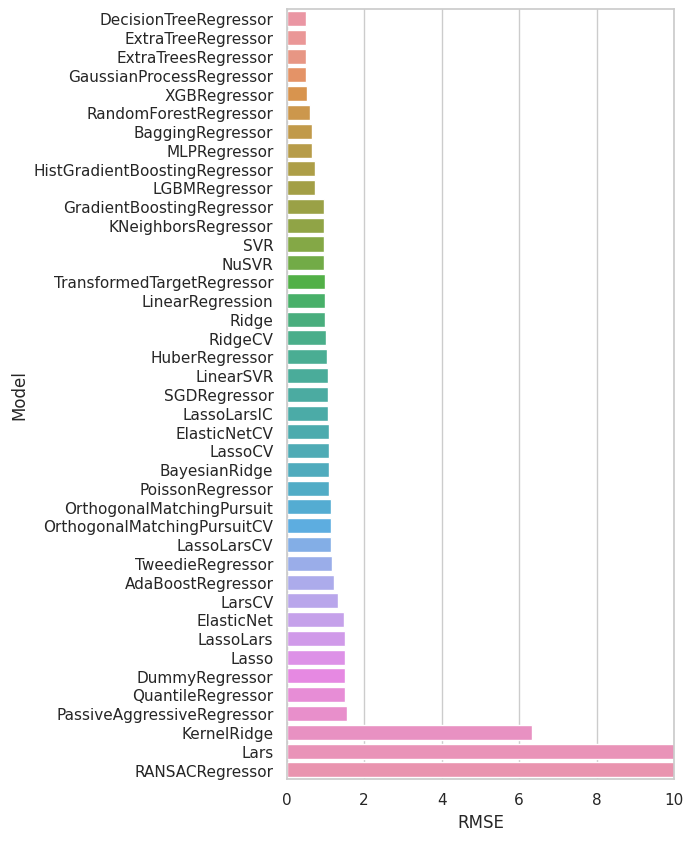

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

Bar plot of calculation time

[(0.0, 10.0)]

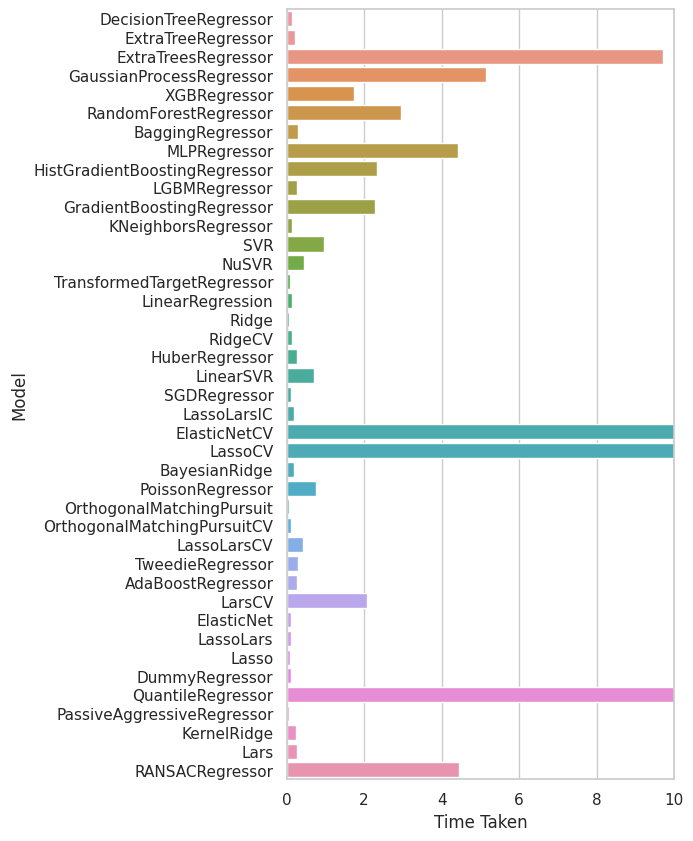

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

# **Clear Unwanted File**

In [ ]:
! ls

aromatase_analysis.zip	  PaDEL-Descriptor.zip	plot_bioactivity_class.png
aromatase_collection.zip  padel.sh		sample_data
aromatase.pkl		  padel.zip


In [ ]:
! rm -r *.csv *.pdf __MACOSX PaDEL-Descriptor *.zip.* *.sh.* *.smi

rm: cannot remove '*.csv': No such file or directory
rm: cannot remove '*.pdf': No such file or directory
rm: cannot remove '__MACOSX': No such file or directory
rm: cannot remove 'PaDEL-Descriptor': No such file or directory
rm: cannot remove '*.zip.*': No such file or directory
rm: cannot remove '*.sh.*': No such file or directory
rm: cannot remove '*.smi': No such file or directory
